In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline

In [2]:
#pd.to_csv('cancer_Data.csv',index=False)
data = pd.read_csv('cancerdata.csv')

In [3]:
data.shape

(569, 32)

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [7]:
data.describe(include='all')

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
count   5.690000e+02       569   569.000000    569.000000      569.000000   
unique           NaN         2          NaN           NaN             NaN   
top              NaN         B          NaN           NaN             NaN   
freq             NaN       357          NaN           NaN             NaN   
mean    3.037183e+07       NaN    14.127292     19.289649       91.969033   
std     1.250206e+08       NaN     3.524049      4.301036       24.298981   
min     8.670000e+03       NaN     6.981000      9.710000       43.790000   
25%     8.692180e+05       NaN    11.700000     16.170000       75.170000   
50%     9.060240e+05       NaN    13.370000     18.840000       86.240000   
75%     8.813129e+06       NaN    15.780000     21.800000      104.100000   
max     9.113205e+08       NaN    28.110000     39.280000      188.500000   

          area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count    569.000000       569.000000        569.000000      569.000000   
unique          NaN              NaN               NaN             NaN   
top             NaN              NaN               NaN             NaN   
freq            NaN              NaN               NaN             NaN   
mean     654.889104         0.096360          0.104341        0.088799   
std      351.914129         0.014064          0.052813        0.079720   
min      143.500000         0.052630          0.019380        0.000000   
25%      420.300000         0.086370          0.064920        0.029560   
50%      551.100000         0.095870          0.092630        0.061540   
75%      782.700000         0.105300          0.130400        0.130700   
max     2501.000000         0.163400          0.345400        0.426800   

        concave points_mean  ...  radius_worst  texture_worst  \
count            569.000000  ...    569.000000     569.000000   
unique                  NaN  ...           NaN            NaN   
top                     NaN  ...           NaN            NaN   
freq                    NaN  ...           NaN            NaN   
mean               0.048919  ...     16.269190      25.677223   
std                0.038803  ...      4.833242       6.146258   
min                0.000000  ...      7.930000      12.020000   
25%                0.020310  ...     13.010000      21.080000   
50%                0.033500  ...     14.970000      25.410000   
75%                0.074000  ...     18.790000      29.720000   
max                0.201200  ...     36.040000      49.540000   

        perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count        569.000000   569.000000        569.000000         569.000000   
unique              NaN          NaN               NaN                NaN   
top                 NaN          NaN               NaN                NaN   
freq                NaN          NaN               NaN                NaN   
mean         107.261213   880.583128          0.132369           0.254265   
std           33.602542   569.356993          0.022832           0.157336   
min           50.410000   185.200000          0.071170           0.027290   
25%           84.110000   515.300000          0.116600           0.147200   
50%           97.660000   686.500000          0.131300           0.211900   
75%          125.400000  1084.000000          0.146000           0.339100   
max          251.200000  4254.000000          0.222600           1.058000   

        concavity_worst  concave points_worst  symmetry_worst  \
count        569.000000            569.000000      569.000000   
unique              NaN                   NaN             NaN   
top                 NaN                   NaN             NaN   
freq                NaN                   NaN             NaN   
mean           0.272188              0.114606        0.290076   
std            0.208624              0.065732        0.061867   
min            0.000000              0.0000

In [8]:
diag_cat = {'B':1,'M':0}
#data.diagnosis=data.diagnosis.replace{'B':1,'M':0}
#data['diagnosis']
data['diagnosis']=data['diagnosis'].replace(diag_cat)

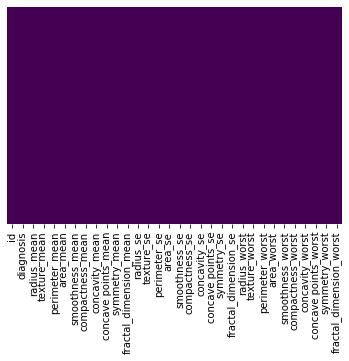

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In [12]:
data.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          0        17.99         10.38          122.80     1001.0   
1    842517          0        20.57         17.77          132.90     1326.0   
2  84300903          0        19.69         21.25          130.00     1203.0   
3  84348301          0        11.42         20.38           77.58      386.1   
4  84358402          0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [13]:
data.describe(include='all')

id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.627417    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    1.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min     143.500000         0.052630          0.019380        0.000000   
25%     420.300000         0.086370          0.064920        0.029560   
50%     551.100000         0.095870          0.092630        0.061540   
75%     782.700000         0.105300          0.130400        0.130700   
max    2501.000000         0.163400          0.345400        0.426800   

       concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count           569.000000  ...    569.000000     569.000000       569.000000   
mean              0.048919  ...     16.269190      25.677223       107.261213   
std               0.038803  ...      4.833242       6.146258        33.602542   
min               0.000000  ...      7.930000      12.020000        50.410000   
25%               0.020310  ...     13.010000      21.080000        84.110000   
50%               0.033500  ...     14.970000      25.410000        97.660000   
75%               0.074000  ...     18.790000      29.720000       125.400000   
max               0.201200  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 32 columns]

In [14]:
pd.set_option('display.max_columns',None)

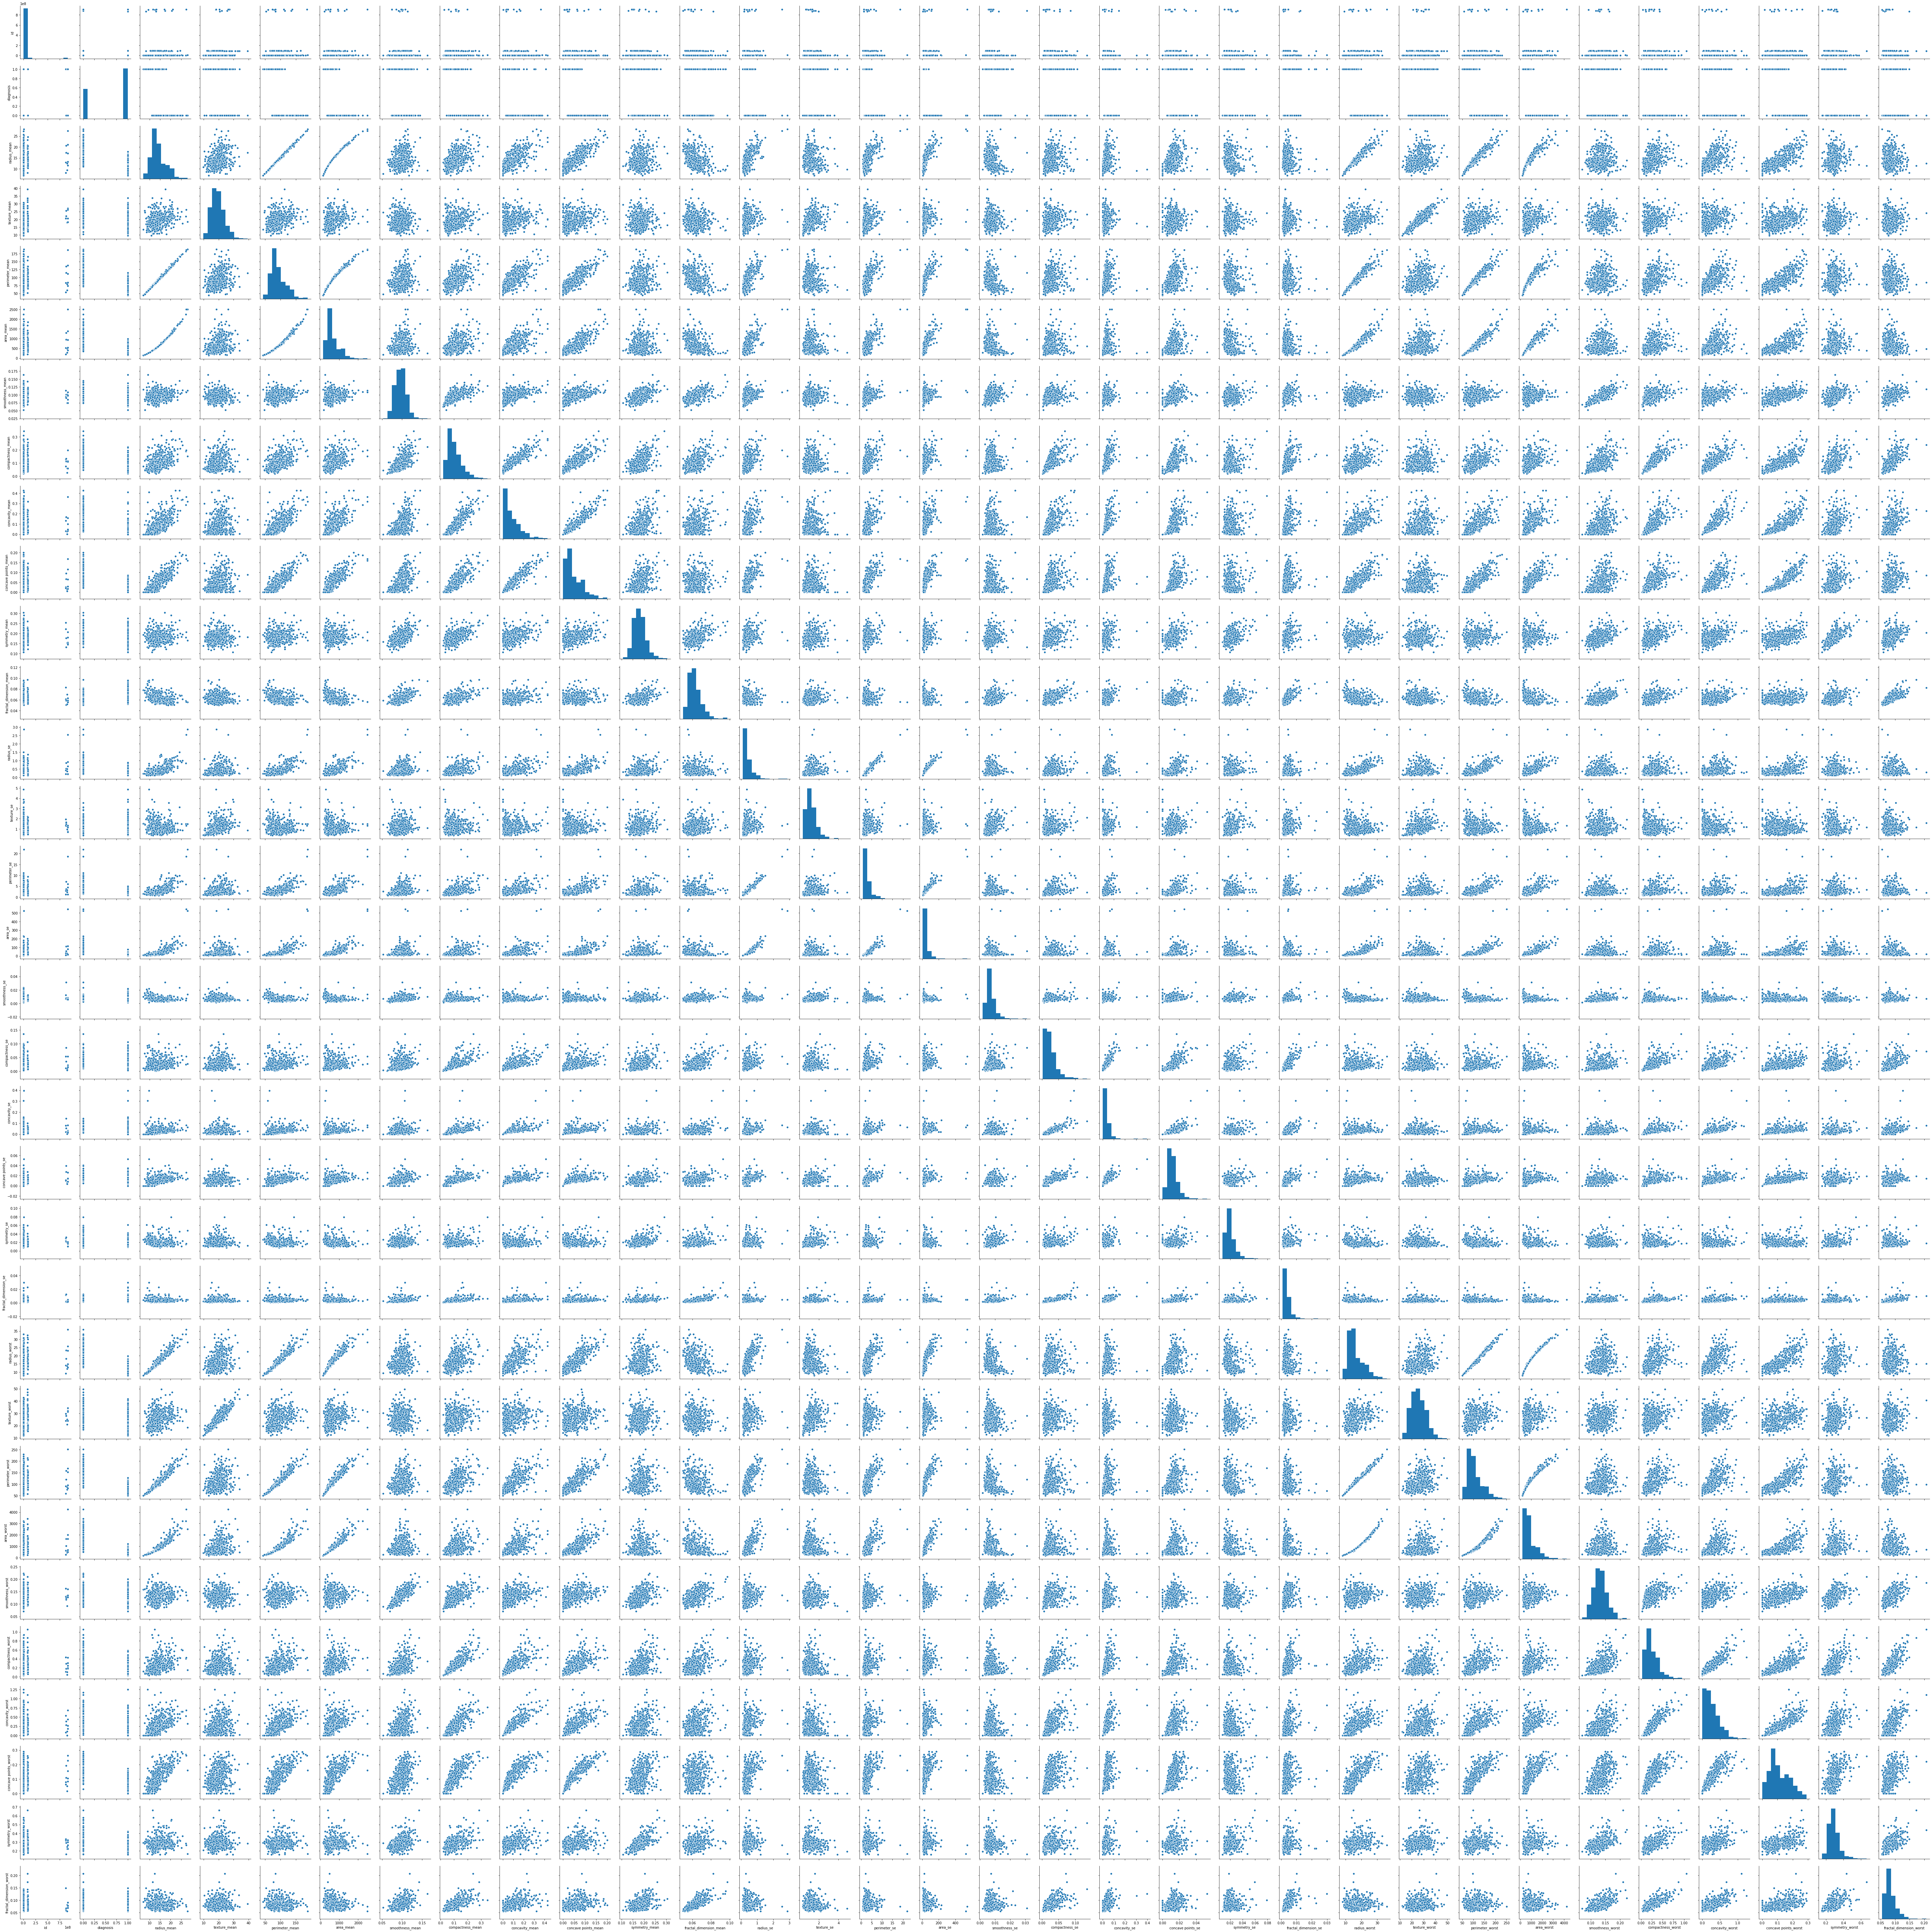

In [31]:
sns.pairplot(data)

In [15]:
feature_cols = ['id','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se',
               'perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se',
               'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
                'compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
X = data[feature_cols]
y = data.diagnosis

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=30)

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [18]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#datacamp reference code
logreg.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#ML blog reference code
y_pred=logreg.predict(X_test)
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        52
           1       0.90      0.78      0.84        91

    accuracy                           0.80       143
   macro avg       0.79      0.81      0.80       143
weighted avg       0.82      0.80      0.81       143

Accuracy: 0.8041958041958042


In [21]:
print(X_test)
print(y_pred)

            id  radius_mean  texture_mean  perimeter_mean  area_mean  \
197     877159       18.080         21.84          117.40     1024.0   
351     899667       15.750         19.22          107.10      758.6   
338     897880       10.050         17.53           64.41      310.8   
47       85715       13.170         18.66           85.98      534.6   
474     911391       10.880         15.62           70.41      358.9   
24      852552       16.650         21.38          110.00      904.6   
309     893548       13.050         13.84           82.71      530.6   
556     924964       10.160         19.59           64.73      311.7   
158     871122       12.060         12.74           76.84      448.6   
364    9010877       13.400         16.95           85.48      552.4   
519     917080       12.750         16.70           82.51      493.8   
449  911157302       21.100         20.52          138.10     1384.0   
348     898690       11.470         16.03           73.02      4

In [22]:
#datacamp reference code
conf_mat = metrics.confusion_matrix(y_test,y_pred)
conf_mat

array([[44,  8],
       [20, 71]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

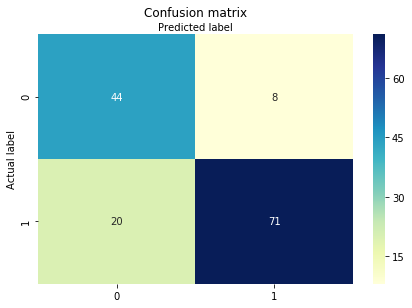

In [23]:
#datacamp reference code
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(conf_mat),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
#datacamp reference code
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8041958041958042
Precision: 0.8987341772151899
Recall: 0.7802197802197802


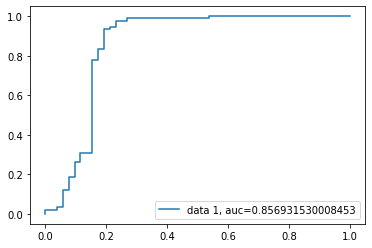

In [25]:
#ROC curve
y_pred_prob=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_prob)
auc=metrics.roc_auc_score(y_test,y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=logreg,X=X_train,y=y_train,cv=5)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
all_accuracies

array([0.40697674, 0.94117647, 0.37647059, 0.42352941, 0.38823529])

In [53]:
logreg.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
logreg.predict_proba(X_test)

array([[0.51266832, 0.48733168],
       [0.50211262, 0.49788738],
       [0.49350274, 0.50649726],
       [0.5293733 , 0.4706267 ],
       [0.49095685, 0.50904315],
       [0.79977741, 0.20022259],
       [0.50764105, 0.49235895],
       [0.48280799, 0.51719201],
       [0.49207577, 0.50792423],
       [0.49429798, 0.50570202],
       [0.50371108, 0.49628892],
       [0.46296389, 0.53703611],
       [0.49006494, 0.50993506],
       [0.58915916, 0.41084084],
       [0.73211063, 0.26788937],
       [0.48704512, 0.51295488],
       [0.54349523, 0.45650477],
       [0.74544681, 0.25455319],
       [0.48619779, 0.51380221],
       [0.4791701 , 0.5208299 ],
       [0.50297799, 0.49702201],
       [0.48955978, 0.51044022],
       [0.5641262 , 0.4358738 ],
       [0.49732571, 0.50267429],
       [0.51327025, 0.48672975],
       [0.55042435, 0.44957565],
       [0.49216318, 0.50783682],
       [0.48193112, 0.51806888],
       [0.49192846, 0.50807154],
       [0.48110118, 0.51889882],
       [0.

In [55]:
y_test

197    0
351    0
338    1
47     0
474    1
24     0
309    1
556    1
158    1
364    1
519    1
449    0
348    1
171    0
162    0
385    0
274    0
503    0
310    1
192    1
154    1
504    1
302    0
157    1
367    1
193    0
208    1
355    1
293    1
290    1
      ..
167    0
392    0
150    1
117    0
38     0
319    1
228    1
8      0
534    1
452    1
76     1
269    1
314    1
291    1
268    1
340    1
152    1
464    1
42     0
408    0
478    1
454    1
174    1
376    1
103    1
201    0
80     1
475    1
180    0
130    1
Name: diagnosis, Length: 143, dtype: int64

In [56]:
y_pred=(logreg.predict_proba(X_test)[:,1]>=0.45)*1

In [58]:
logreg.predict_proba(X_test)[:,1]>=0.3

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [59]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [60]:
metrics.roc_auc_score(y_test,y_pred)

0.7307692307692308

In [61]:
y_test.value_counts()

1    91
0    52
Name: diagnosis, dtype: int64

In [62]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[24, 28],
       [ 0, 91]], dtype=int64)

In [63]:
logreg.predict(X_test)

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

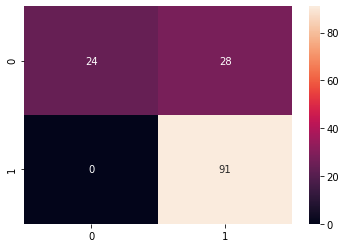

In [64]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8041958041958042
Precision: 0.7647058823529411
Recall: 1.0


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63        52
           1       0.76      1.00      0.87        91

    accuracy                           0.80       143
   macro avg       0.88      0.73      0.75       143
weighted avg       0.85      0.80      0.78       143



In [67]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

6.762993900598215

In [77]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [78]:
from sklearn.model_selection import cross_val_score  
all_accuracies=cross_val_score(estimator=logreg,X=X1_train,y=y1_train, cv=3)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
all_accuracies

array([0.47712418, 0.8807947 , 0.64238411])

In [88]:
logreg.fit(X1_train,y1_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y1_pred=(logreg.predict_proba(X1_test)[:,1]>=0.45)*1
y1_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1])

In [90]:
metrics.roc_auc_score(y1_test, y1_pred)

0.8952904238618525

In [83]:
cnf_matrix = metrics.confusion_matrix(y1_test, y_pred)
cnf_matrix

array([[41,  8],
       [ 3, 62]], dtype=int64)

In [93]:
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))

Accuracy: 0.9035087719298246
Precision: 0.8857142857142857
Recall: 0.9538461538461539


In [100]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        49
           1       0.89      0.95      0.92        65

    accuracy                           0.90       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.90      0.90       114



In [95]:
from sklearn.metrics import log_loss
log_loss(y1_test,y1_pred)

3.332745062486484

In [96]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [107]:
all_accuracies=cross_val_score(estimator=logreg,X=X2_train,y=y2_train, cv=4)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [108]:
all_accuracies

array([0.38596491, 0.37719298, 0.88596491, 0.6460177 ])

In [109]:
logreg.fit(X2_train,y2_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
y2_pred=(logreg.predict_proba(X2_test)[:,1]>=0.45)*1

In [111]:
metrics.roc_auc_score(y2_test,y2_pred)

0.8952904238618525

In [112]:
cnf_matrix=metrics.confusion_matrix(y2_test,y2_pred)
cnf_matrix

array([[41,  8],
       [ 3, 62]], dtype=int64)

In [113]:
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))

Accuracy: 0.9035087719298246
Precision: 0.8857142857142857
Recall: 0.9538461538461539


In [114]:
log_loss(y2_test,y2_pred)

3.332745062486484

In [142]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X,y,test_size=0.4,random_state=100)

In [179]:
all_accuracies=cross_val_score(estimator=logreg,X=X3_train,y=y3_train, cv=4)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [144]:
all_accuracies

array([0.38372093, 0.37647059, 0.36470588, 0.63529412])

In [145]:
logreg.fit(X3_train,y3_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
y3_pred=(logreg.predict_proba(X3_test)[:,1]>=0.45)*1

In [147]:
metrics.roc_auc_score(y3_test,y3_pred)

0.8734409391049156

In [148]:
cnf_matrix=metrics.confusion_matrix(y3_test,y3_pred)
cnf_matrix

array([[ 73,  14],
       [ 13, 128]], dtype=int64)

In [149]:
print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))
print("Precision:",metrics.precision_score(y3_test, y3_pred))
print("Recall:",metrics.recall_score(y3_test, y3_pred))

Accuracy: 0.881578947368421
Precision: 0.9014084507042254
Recall: 0.9078014184397163


In [150]:
log_loss(y3_test,y3_pred)

4.090167355379874

In [180]:
X4_train,X4_test,y4_train,y4_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [181]:
all_accuracies=cross_val_score(estimator=logreg,X=X4_train,y=y4_train, cv=3)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [182]:
all_accuracies

array([0.36619718, 0.36619718, 0.35915493])

In [183]:
logreg.fit(X4_train,y4_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
y4_pred=(logreg.predict_proba(X4_test)[:,1]>=0.35)*1

In [185]:
metrics.roc_auc_score(y4_test,y4_pred)

0.5625

In [186]:
cnf_matrix=metrics.confusion_matrix(y4_test,y4_pred)
cnf_matrix

array([[ 7, 49],
       [ 0, 87]], dtype=int64)

In [187]:
print("Accuracy:",metrics.accuracy_score(y4_test, y4_pred))
print("Precision:",metrics.precision_score(y4_test, y4_pred))
print("Recall:",metrics.recall_score(y4_test, y4_pred))

Accuracy: 0.6573426573426573
Precision: 0.6397058823529411
Recall: 1.0


In [188]:
log_loss(y4_test,y4_pred)

11.835239326046874